# Part 2 of 2D Data Tracks: Histograms

This page is primarily based on the following page at the Circos documentation site:



- [3. Histograms](????????????)



That page is found as part number 4 of the ??? part ['2D Data Tracks' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 2 by clicking [here &#8592;](2d_data_tracks_Part2.ipynb).



----



6 --- 2D Data Tracks
====================

3. Histograms
-------------

::: {#menu4}
[[Lesson](/documentation/tutorials/2d_tracks/histograms/lesson){.clean}]{.active}
[Images](/documentation/tutorials/2d_tracks/histograms/images){.normal}
[Configuration](/documentation/tutorials/2d_tracks/histograms/configuration){.normal}
:::

Circos\' histograms are a variation on the line plot. In a line plot,
adjacent points are connected by a straight line whereas in a histogram
the points form a step-like trace. To make a histogram, set
`type=histogram`.

In line and scatter plots, the data point is placed at the midpoint of
the point\'s span. Thus, if you define a data point

```ini
hs1 1000 2000 0.5
```


the point will be plotted at position 1500. If your data associates a
value with a specific base pair position, set the start and end position
to be the same. For example,

```ini
hs1 1500 1500 0.5
```


In the histogram plot, however, the entire range 1000-2000 is used to
define a histogram bin with a value of 0.5.

### extending bins

If you set `extend_bin=yes`, the bin\'s left and right sides are
extended to the mid-point between this and the neighbouring bin. This
behaviour, in which bins are extended to meet their neighbours, is the
default setting. Explicitly setting `extend_bin=yes` is not necessary
(but useful if you want to toggle this feature later).

For example, if you have data points

```ini
hs1 1000 2000 0.5
hs1 5000 5500 0.25
hs1 9000 9250 0.75
```


you set `extend_bin=yes`, the middle bin 5000-5500 will have its left
side extended to `avg(2000,5000)=3500` and its right side to
`avg(5500,9000)=7250`. Thus, even though the data spans are not
contiguous, the histogram trace will be contiguous across the three
bins.

If you use `extend_bin=no`, then the histogram will have three bins,
each rising from the baseline of the plot.

The sample image for this tutorial section contains many histograms with
a variety of combinations of `extend_bin` and `fill_color`. You\'ll
notice that even if you set `extend_bin=no`, bins which abut (start/end
are within 1bp of each other) will be joined. This makes `extend_bin=no`
useful to distinguish regions where you have no data.

If your data set is very dense, the histogram can become very busy and
difficult to interpret. The histogram and line plots are most useful
when the angular distance between adjacent data points spans at least
several pixels.

The histogram plot type is very effective for data sets which assign a
floating point to a span rather than a single genomic point. If your
data is very dense relative to your output scale, however, I suggest
using the line plot.

### skipping data points

You can write a rule that skips certain data points using Perl\'s modulo
`%` operator. For example, if you have data points whose start/end
coordinates being every 250kb, but want to draw points only every 1Mb,
you would set up a rule like this

```ini
<rule>
condition  = var(start) % 1Mb
show       = no
</rule>
```


The condition is the remainder of the bin\'s start value (250kb, 500kb,
750kb, \...) when divided by 1Mb. If `start` is a multiple of 1Mb, then
the remainder is zero and the rule fails. However, if `start` is not a
multiple of 1Mb, the remainder is positive and the rule applies show=no
to the point, effectively hiding the point. In order for this approach
to work, your `start` must have a common divisor.

### coping with sampling rate

Regardless whether you create a bitmap or SVG image, it is not useful to
draw more data on the image than can be resolved given the image size.
For example, if your ideogram radius is 1000 pixels, the circumference
at the ideograms is about 6000 pixels. Thus, you have only 6000
distinguishable positions at which data can be drawn (e.g. scatter plot,
line plot, histogram, etc). If you consider sub-pixels sampling that is
made possible with anti-aliasing, then at most you have about 12,000
positions. If your data samples values at more than 12,000 different
locations, it will be be visible.

If your data set samples positions much more frequently than this
maximum resolvable number (e.g. at 1,000,000 different positions vs
12,000 distinguishable positions) you can easily run into trouble
because (a) data points or lines will stack and occlude each other or
(b) Circos will run out of memory. The reason why (b) can happen is
because Circos is not optimized to manage large amounts (millions) of
data inputs.

To better manage large data sets within Circos, you can write a rule
that draws data at positions that are multiples of a value (e.g. 100kb).
However, Circos will still read in all the data values and try to store
them in memory.

To avoid reading in all the data, use `skip_run` and `min_value_change`
parameters. The `skip_run` parameter, when set, makes Circos read in
only the first data point of a consecutive set of points with the same
value. For example,

```ini
<plot>
skip_run = yes
...
</plot>
```


```ini
# data input
chr1 100 200 0.25 # read in
chr1 200 300 0.1  # read in
chr1 300 400 0.1  # not read in
chr1 400 500 0.1  # not read in
chr1 500 600 0.1  # not read in
chr1 600 700 0.3  # read in
```


The `min_value_change` parameter works similarly and requires that the
nth value that is read in must have its value difference (absolute
difference is used) by at least min\_value\_change from the (n-1)th
value that is read in. For example,

```ini
<plot>
min_value_change = 5
...
</plot>
```


```ini
# data input
chr1 100 200 1   # read in
chr1 200 300 2   # not read in (difference = 1 < 5)
chr1 300 400 5   # not read in (difference = 4 < 5)
chr1 400 500 6   # read in     (difference = 5 >= 5)
chr1 500 600 3   # not read in (difference = 3 < 5)
chr1 600 700 13  # read in     (difference = 7 >= 5)
chr1 
```


Note that even though the difference between the data points with values
3 and 13 is greater than min\_value\_change, because the data point with
value 6 is read in, the data point with value 3 is not because it does
not pass the minimum difference cutoff with the previously accepted
value (6).

Even though these primitive data sampling methods are available, I
strongly suggest that you filter and average your data yourself, before
using it as input to Circos. You\'ll have complete control over what is
displayed (e.g., in the above example you might argue that the data
point with value 3 should also be displayed \... and I would tend to
agree).

### setting axis range

If you do not specify the axis range using `min/max` values, then the
axis will be scaled to span the full range of the data. You can set the
axis range explicitly. For example

```ini
min=-1
max=0
```


will effectively hide any values outside this range.

### hiding values

You can crop data values by setting the axis range, as shown above. For
example, if your data is in the range `[-1,1]` and you set

```ini
min=0
max=1
```


then only the data in the subrange `[0,1]` will be shown. However, if
you would like to keep the original axis range, and supress display of a
data range you should use rules. The rule below will hide the display of
negative data.

```ini
<rules>
<rule>
condition  = var(value) < 0
show       = no
</rule>
</rules>
```


### axis orientation

By default, the y-axis is oriented outward. This means that smaller
values are closer to the center of the circle than larger ones. For
histograms, the net effect is that bins for positive values point
outward and bins for negative values point inward. This is a direct
result of the fact that bins always drop to y=0, if within display
range, or to the axis end closer to y=0.

You can adjust the direction of the y-axis by using the orientation
setting. To make the y-axis point inward (larger values are closer to
the center), use

```ini
orientation = in
```


The effect will be the same as flipping the sign on all your data
values.

### filling histograms

You can fill under the connecting line in a histogram by using
`fill_color`.

```ini
fill_color = red
```


By combining two histograms together, one each for negative and positive
data, with different background colors, you can achieve visually
appealing separation between negative and positive values.

### filling extended bins

Extended bins are filled and stroked according to the format of the
original bins. When bins are extended, those corresponding to the same
signed value (positive, or negative) abut. No stroke appears between
this interface.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/6/3/

/home/jovyan/circos-tutorials-0.67/tutorials/6/3


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.37s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.39s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/6/3
debuggroup summary 0.39s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.39s loading configuration from file circos.conf
debuggroup summary 0.39s found conf file circos.conf
debuggroup summary 0.57s debug will appear for these features: output,summary
debuggroup summary 0.57s bitmap output image ./circos.png
debuggroup summary 0.57s SVG output image ./circos.svg
debuggroup summary 0.57s parsing karyotype and organizing ideograms
debuggroup summary 0.70s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.71s applying global and local scaling
debuggroup summary 0.72s allocating image, colors and brushes
debuggroup summary 3.02s drawing 1 ideograms of total size 249,250,622
debuggroup summary 3.02s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized val

View the plot in this page using the following cell.

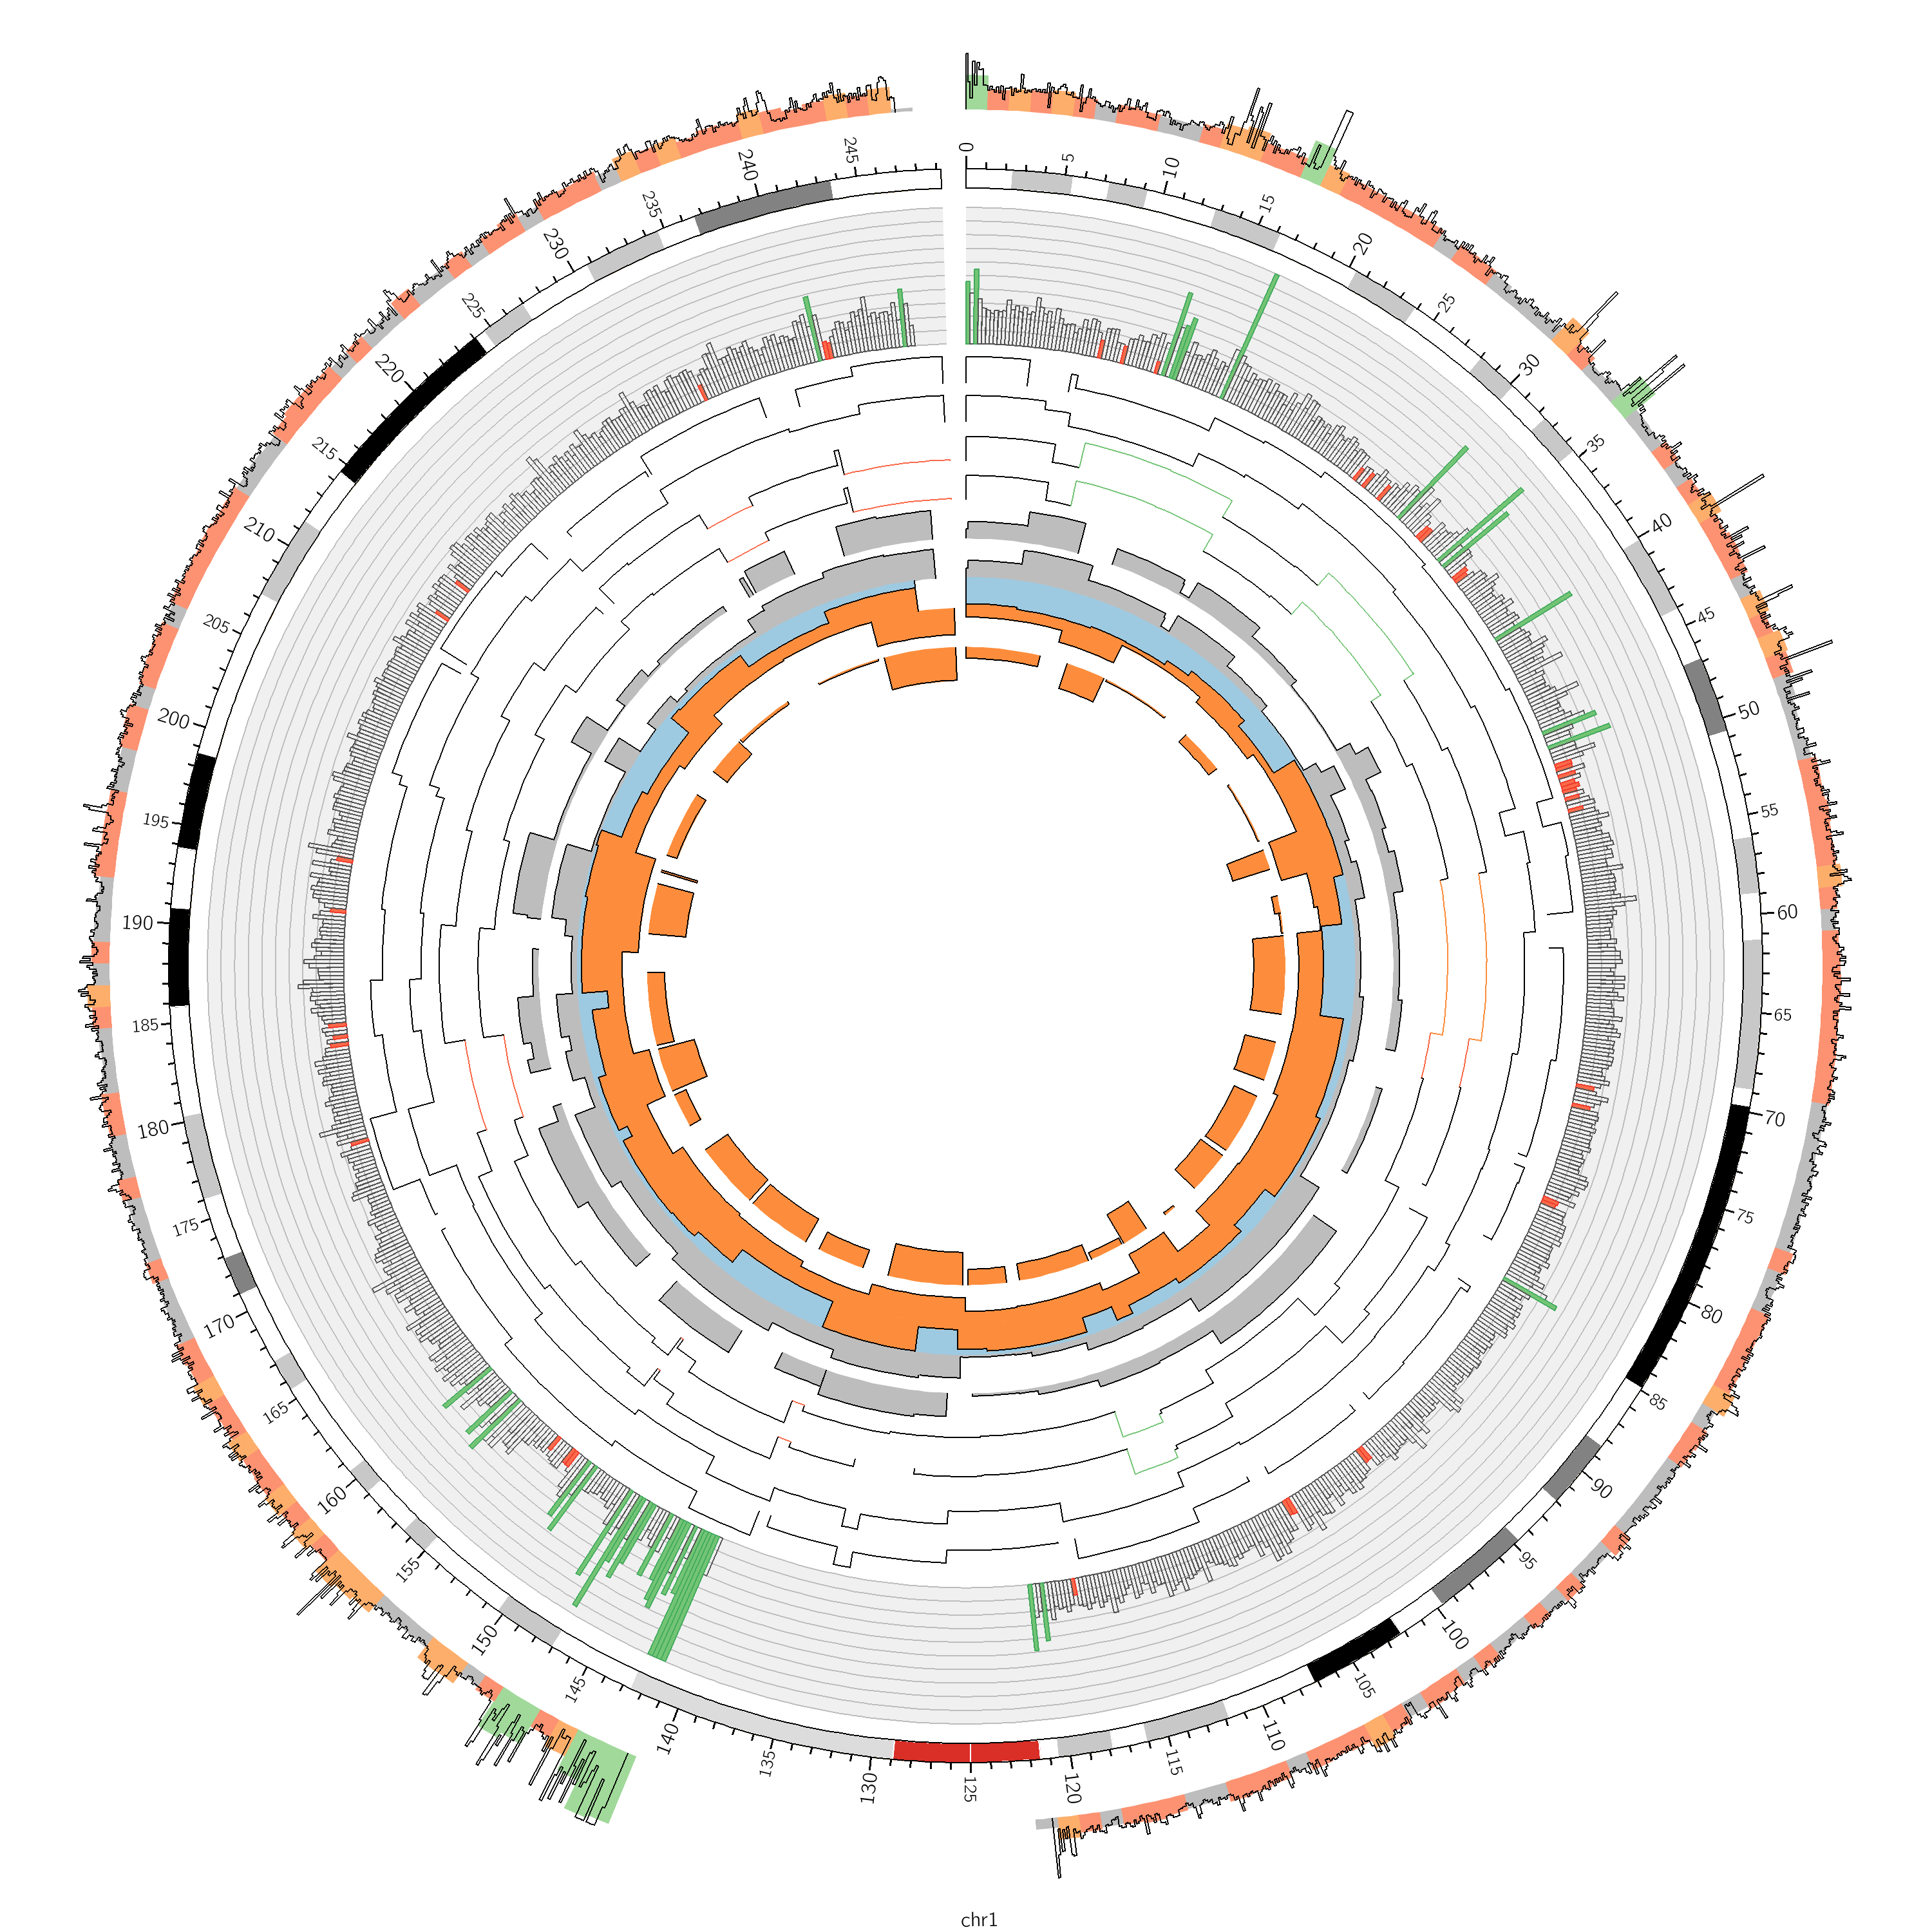

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the 2D Data Tracks series by clicking [here &#10145;](2d_data_tracks_Part4.ipynb).

----